In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

import re

In [38]:
df = pd.read_csv("E:\\Projects\\Lab_monitor_IOT.csv")
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,8/12/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,8/12/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,8/12/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,8/12/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,8/12/2018 9:29,31,In


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


# Preprocessing and Data Cleaning.

Steps for pre-processing are:
1. Handling Missing Data
2. Handing Outliers
3. Handling Encoding
4. Handing Imbalance data set --- but here we need to find out/predict the temperature, so it regression problem. So, we will not do this step. 
5. Feature SCaling. -- needed step. 

Data Cleaning:
1. Extracting the correct ID
2. Bifercating the data and time
3. Time - based on day and night(further in 4 quarters)
4. Month based on the seasons

In [40]:
df.isnull().sum()  #No missing values

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [41]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


<AxesSubplot:xlabel='temp'>

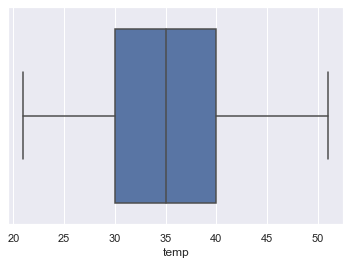

In [42]:
sns.boxplot(df['temp'])

In [43]:
df['room_id/id'].value_counts()

Room Admin    97606
Name: room_id/id, dtype: int64

In [44]:
df['room_id/id'].nunique()

1

As we see onlt 1 unqiue value is there in ['room_id/id'], it will not impact the analysis. Deleteing the same.

In [45]:
df = df.drop(['room_id/id'],axis=1)

In [46]:
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,8/12/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,8/12/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,8/12/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,8/12/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,8/12/2018 9:29,31,In


### Extracting the Id from the id

In [47]:
df['id_new'] = df['id'].str.extract('(\d+)')
df.head()

,id,noted_date,temp,out/in,id_new
0,__export__.temp_log_196134_bd201015,8/12/2018 9:30,29,In,196134
1,__export__.temp_log_196131_7bca51bc,8/12/2018 9:30,29,In,196131
2,__export__.temp_log_196127_522915e3,8/12/2018 9:29,41,Out,196127
3,__export__.temp_log_196128_be0919cf,8/12/2018 9:29,41,Out,196128
4,__export__.temp_log_196126_d30b72fb,8/12/2018 9:29,31,In,196126


In [48]:
df = df[['id_new','noted_date','temp','out/in']]
df.head()

,id_new,noted_date,temp,out/in
0,196134,8/12/2018 9:30,29,In
1,196131,8/12/2018 9:30,29,In
2,196127,8/12/2018 9:29,41,Out
3,196128,8/12/2018 9:29,41,Out
4,196126,8/12/2018 9:29,31,In


### Bifercating the date and time

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_new      97606 non-null  object
 1   noted_date  97606 non-null  object
 2   temp        97606 non-null  int64 
 3   out/in      97606 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


df['noted_date'] is not the datetime format. So, first we change the date and time format and then we will try to do various analysis. 

In [50]:
df['noted_date'] =pd.to_datetime(df['noted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_new      97606 non-null  object        
 1   noted_date  97606 non-null  datetime64[ns]
 2   temp        97606 non-null  int64         
 3   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


In [51]:
df.head()

,id_new,noted_date,temp,out/in
0,196134,2018-08-12 09:30:00,29,In
1,196131,2018-08-12 09:30:00,29,In
2,196127,2018-08-12 09:29:00,41,Out
3,196128,2018-08-12 09:29:00,41,Out
4,196126,2018-08-12 09:29:00,31,In


In [60]:
df['Year']=df['noted_date'].dt.year
df['Month'] = df['noted_date'].dt.month
df['Month Name'] = df['noted_date'].dt.month_name()
df['Quarter'] = df['noted_date'].dt.quarter
df['Day Name'] = df['noted_date'].dt.day_name()
df['Weekend'] = np.where(df['Day_Name'].isin(["Saturday","Sunday"]), 1,0)
df['Hour'] = df['noted_date'].dt.hour
df['Min'] = df['noted_date'].dt.minute
df['AM/PM'] = np.where(df['Hour'] < 12,'AM','PM')
df.head()

,id_new,noted_date,temp,out/in,Year,Month,Quarter,Day_Name,Weekend,Month Name,Day Name,Hour,Min,AM/PM
0,196134,2018-08-12 09:30:00,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM
1,196131,2018-08-12 09:30:00,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM
2,196127,2018-08-12 09:29:00,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM
3,196128,2018-08-12 09:29:00,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM
4,196126,2018-08-12 09:29:00,31,In,2018,8,3,Sunday,1,August,Sunday,9,29,AM


In [61]:
df['AM/PM'].value_counts()

PM    54266
AM    43340
Name: AM/PM, dtype: int64

In [62]:
def maen(tt):
    if tt >= 6 and tt < 12:
        return 'Morning'
    elif tt >=12 and tt < 18:
        return 'Afternoon'
    elif tt >=18 and tt < 22:
        return 'Evening'
    else:
        return 'Night'
    
df['Day_Timing'] = df['Hour'].apply(maen)
df.head()

,id_new,noted_date,temp,out/in,Year,Month,Quarter,Day_Name,Weekend,Month Name,Day Name,Hour,Min,AM/PM,Day_Timing
0,196134,2018-08-12 09:30:00,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning
1,196131,2018-08-12 09:30:00,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning
2,196127,2018-08-12 09:29:00,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning
3,196128,2018-08-12 09:29:00,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning
4,196126,2018-08-12 09:29:00,31,In,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning


In [63]:
df['Day_Timing'].value_counts()

Afternoon    30631
Night        27687
Morning      22427
Evening      16861
Name: Day_Timing, dtype: int64

In [64]:
df['Month Name'].value_counts()

October      44651
November     16269
September    11892
December      6298
March         4579
April         3334
June          2976
July          2181
August        1764
February      1250
May           1224
January       1188
Name: Month Name, dtype: int64

In [66]:
def weather(w):
    if w in ['December','January','February']:
        return 'Winter'
    elif w in ['March','April','May']:
        return 'Summer'
    elif w in ['June','July','August','September']:
        return 'Monsoon'
    else:
        return 'Post Monsoon'
    
df['Season'] = df['Month Name'].apply(weather)
df.head()

,id_new,noted_date,temp,out/in,Year,Month,Quarter,Day_Name,Weekend,Month Name,Day Name,Hour,Min,AM/PM,Day_Timing,Season
0,196134,2018-08-12 09:30:00,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning,Monsoon
1,196131,2018-08-12 09:30:00,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning,Monsoon
2,196127,2018-08-12 09:29:00,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning,Monsoon
3,196128,2018-08-12 09:29:00,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning,Monsoon
4,196126,2018-08-12 09:29:00,31,In,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning,Monsoon


In [67]:
# We don't need the 'noted_date' columns now. So deleting the same. 

df = df.drop(['noted_date'],axis=1)
df.head()

,id_new,temp,out/in,Year,Month,Quarter,Day_Name,Weekend,Month Name,Day Name,Hour,Min,AM/PM,Day_Timing,Season
0,196134,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning,Monsoon
1,196131,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning,Monsoon
2,196127,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning,Monsoon
3,196128,41,Out,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning,Monsoon
4,196126,31,In,2018,8,3,Sunday,1,August,Sunday,9,29,AM,Morning,Monsoon


In [70]:
# We will also not require ID - as it will not contribute in the prediction of the temperature.

df = df.drop(['id_new'],axis=1)
df.head(1)

,temp,out/in,Year,Month,Quarter,Day_Name,Weekend,Month Name,Day Name,Hour,Min,AM/PM,Day_Timing,Season
0,29,In,2018,8,3,Sunday,1,August,Sunday,9,30,AM,Morning,Monsoon


# Exploratory Data Analysis

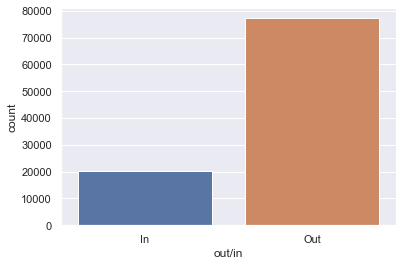

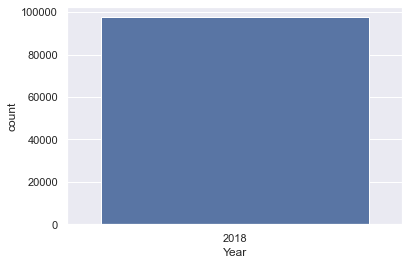

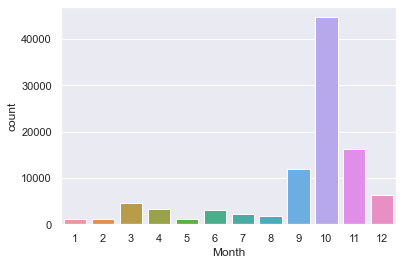

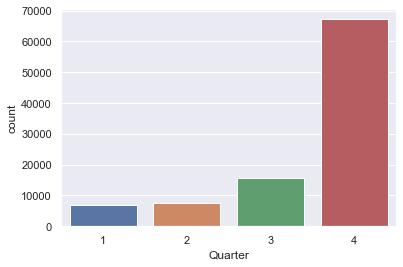

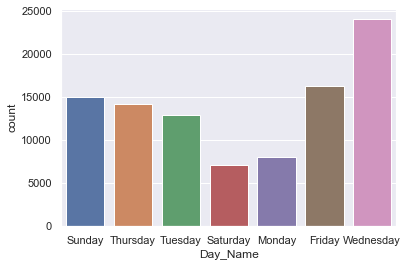

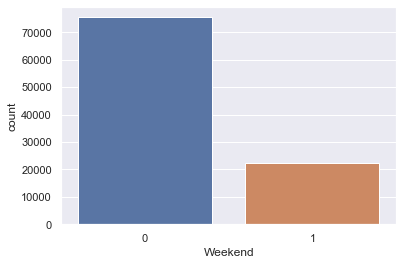

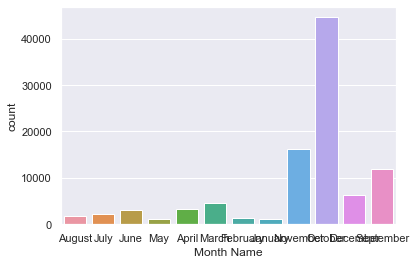

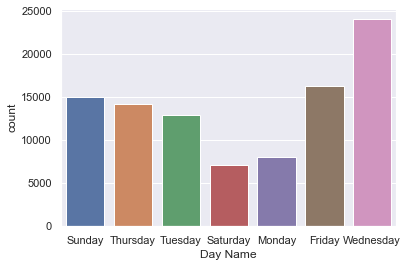

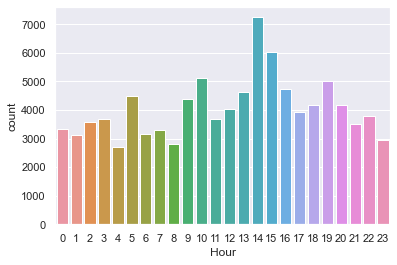

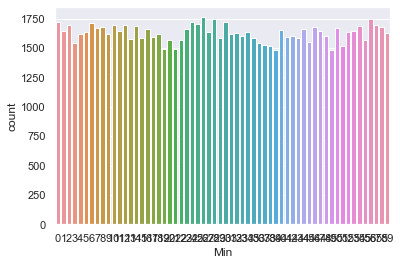

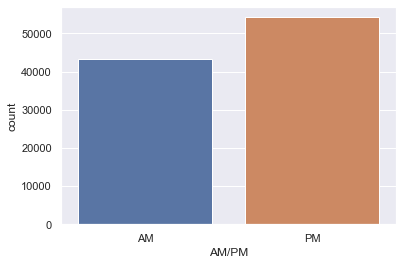

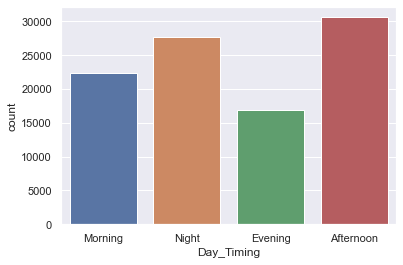

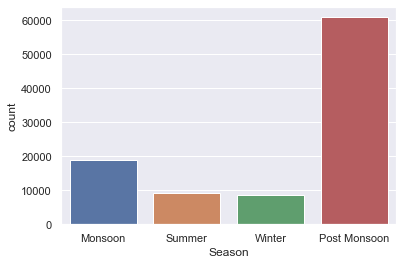

In [72]:
for i in df.columns:
    if i == 'temp':
        continue
    else:
        sns.countplot(df[i])
        plt.show()

#### Insight 1:

1. 10th month has maximum readings and thus we see the the quarter 4 is most, and post monsoon readings are also the most. 
2. Outside temperature has been recorded mpre often
3. Afternoon Timing has maximum recording.

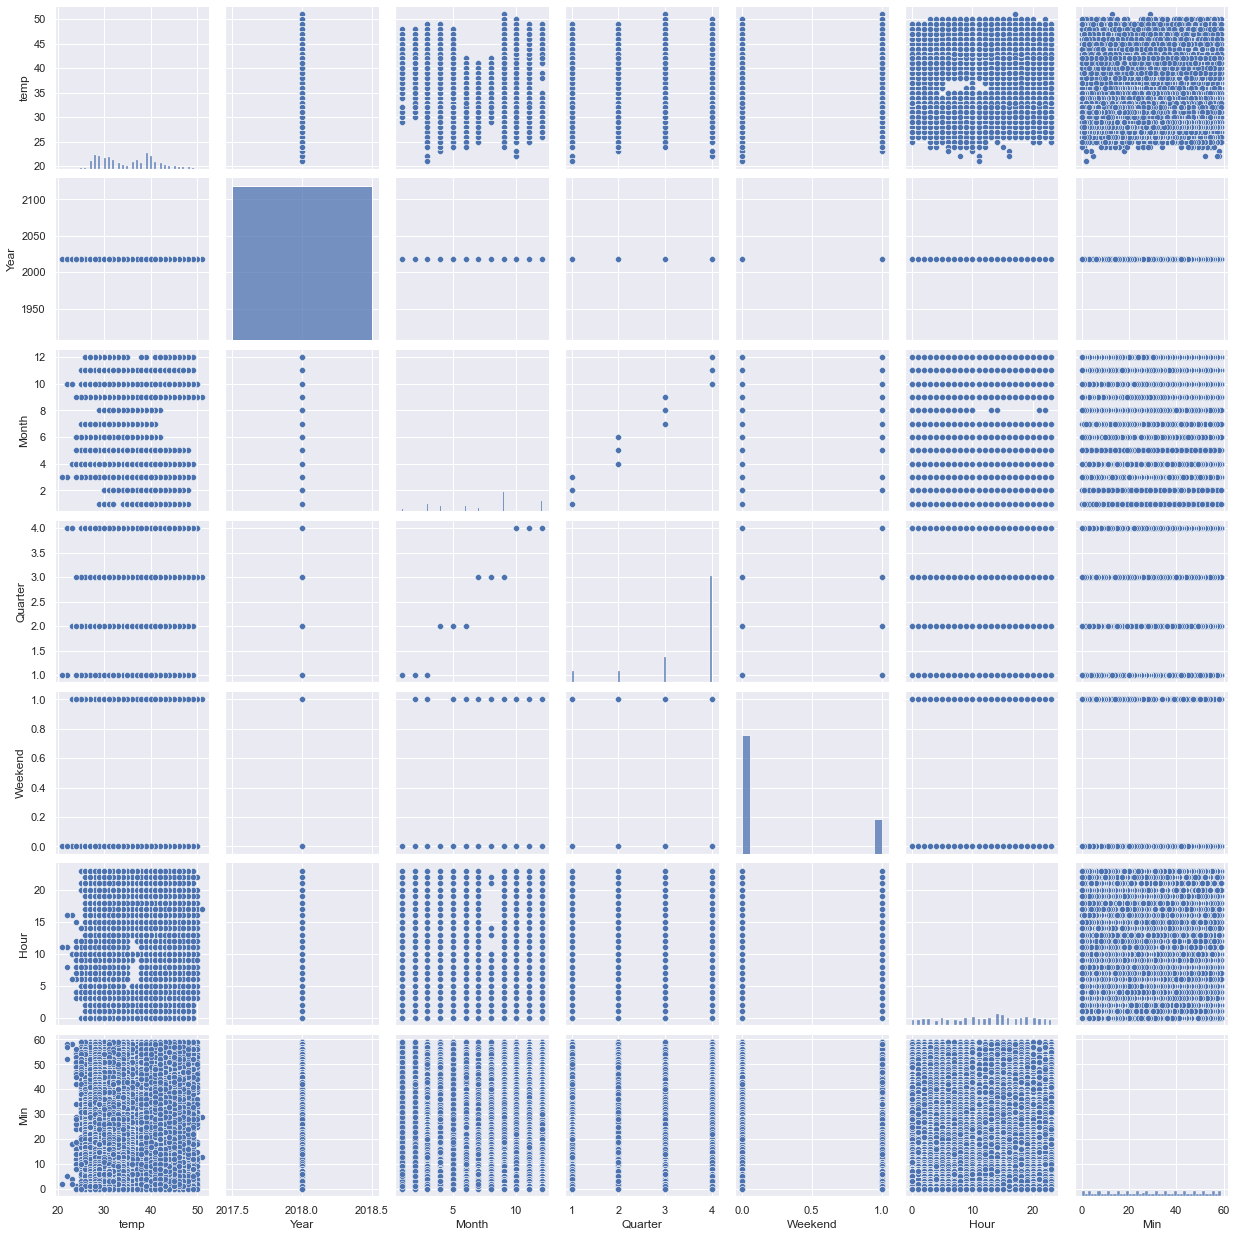

In [185]:
sns.pairplot(df)

In [141]:
df = df[['temp','out/in','Year','Month','Month Name','Quarter','Day_Name','Weekend','Day_Timing','Season','Hour','Min','AM/PM']]
df.head(1)

,temp,out/in,Year,Month,Month Name,Quarter,Day_Name,Weekend,Day_Timing,Season,Hour,Min,AM/PM
0,29,In,2018,8,August,3,Sunday,1,Morning,Monsoon,9,30,AM


### IN _ OUT Wise Temperature ANalysis

<AxesSubplot:ylabel='temp'>

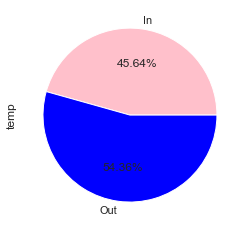

In [162]:
inout = df.groupby('out/in').mean()['temp']
inout.plot(kind='pie',autopct='%0.2f%%',colors=['pink','blue'])

In [ ]:
Inside temperature is lesser than outside temperature. 

#### MONTH _ WISE ANALYSIS

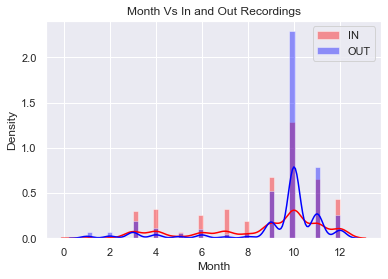

In [100]:
sns.distplot(df[df['out/in']=='In']['Month'],color='red',label='IN')
sns.distplot(df[df['out/in']=='Out']['Month'],color ='blue',label='OUT')
plt.title("Month Vs In and Out Recordings")
plt.legend()

<AxesSubplot:xlabel='Month'>

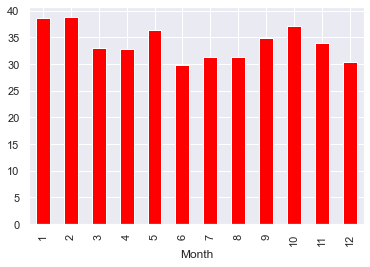

In [99]:
monthwise = df.groupby(['Month']).mean()['temp']
monthwise.plot(kind='bar',color='red')

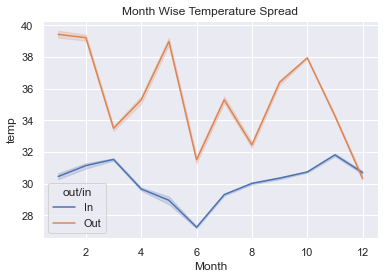

In [167]:
sns.lineplot(df['Month'],df['temp'],hue=df['out/in'])
plt.title("Month Wise Temperature Spread")
plt.show()

#### Insight 2

January and February -- Temperature average is maximum. 
But on an average the room inside temperature than the outside temperature. 

### Quater Wise Analysis

<AxesSubplot:ylabel='temp'>

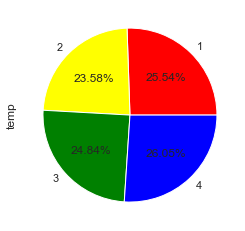

In [139]:
quart =df.groupby('Quarter').mean()['temp']
quart.plot(kind='pie',autopct='%0.2f%%',colors=['red','yellow','green','blue'])

<AxesSubplot:xlabel='Quarter', ylabel='temp'>

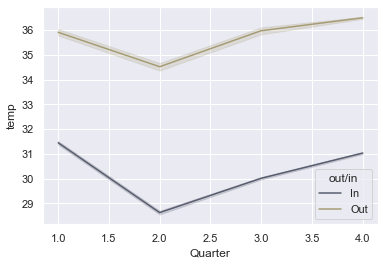

In [177]:
sns.lineplot(df['Quarter'],df['temp'],hue=df['out/in'],palette='cividis')

Quarter 1 and 4 seems to have more temperature average. Least temperature average is of 2nd quarter.
for both inside and outside temperature, there was a huge dip in the temperature in the 2nd quarter. 

### Day- Wise Analysis:

<AxesSubplot:xlabel='Day_Name'>

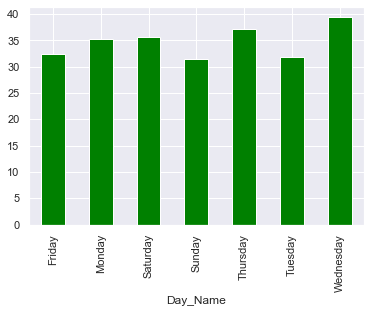

In [115]:
daywise_temp = df.groupby(['Day_Name']).mean()['temp']
daywise_temp.plot(kind='bar',color='green')

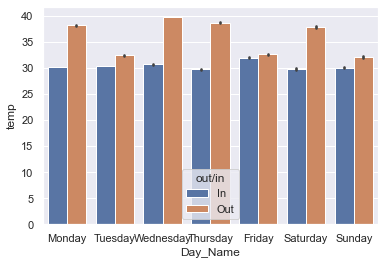

In [182]:
sns.barplot(df['Day_Name'],df['temp'],hue=df['out/in'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

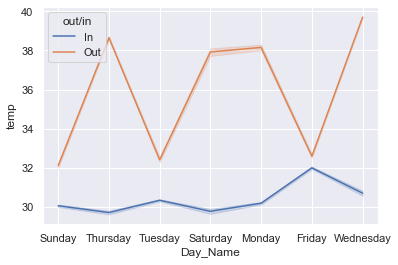

In [184]:
sns.lineplot(df['Day_Name'],df['temp'],hue=df['out/in'])
plt.show()

<AxesSubplot:ylabel='temp'>

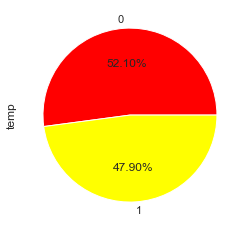

In [121]:
weekend_wise = df.groupby('Weekend').mean()['temp']
weekend_wise.plot(kind='pie',autopct='%0.2f%%',colors=['red','yellow'])

<AxesSubplot:ylabel='Day_Timing'>

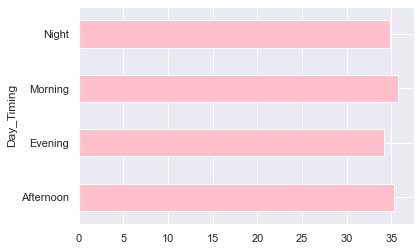

In [145]:
maen_wise = df.groupby(['Day_Timing']).mean()['temp']
maen_wise.plot(kind='barh',color='pink')

<AxesSubplot:xlabel='Day_Timing', ylabel='temp'>

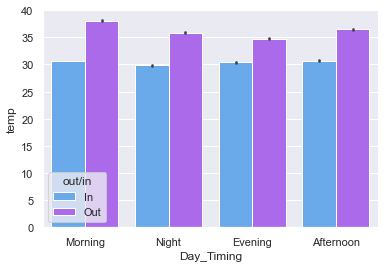

In [179]:
sns.barplot(df['Day_Timing'],df['temp'],hue=df['out/in'],palette='cool')

### Insight 3

Wednesday have highest temperage average. 

In the weekends, temperature mean is higher than that in weekdays.

Mornings and Afternoons have more temperature average, evenings and night may be a bit cooler. 

Sunday, Tuesdays and Friday shows a big dip in the outside temperature. Although inside temperature doesn't hsow so much variation.

### Season Analysis

<AxesSubplot:xlabel='Season'>

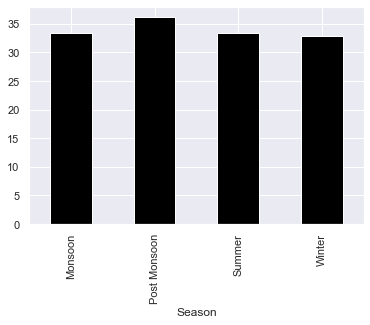

In [149]:
Seasonwise=df.groupby('Season').mean()['temp']
Seasonwise.plot(kind='bar',color='black')

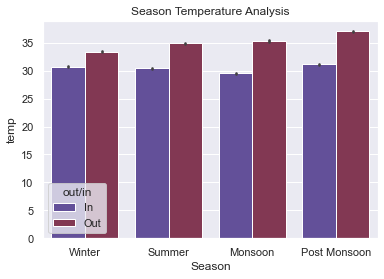

In [173]:
sns.barplot(df['Season'],df['temp'],hue=df['out/in'],palette="twilight",order=['Winter','Summer','Monsoon','Post Monsoon'])
plt.title("Season Temperature Analysis")
plt.show()

#### Insight 4

PostMonsoon has highest temperature average -- reason may be very high humidity. (But it is not mentioned so we will not comment on the same.) Plus the outside temperature is more.

### TIME _ RELATED ANALYSIS

<AxesSubplot:ylabel='Hour'>

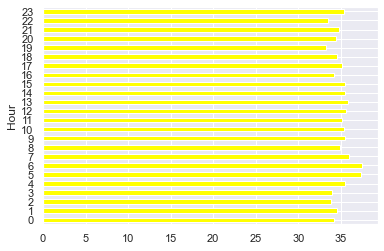

In [158]:
Hourwise=df.groupby('Hour').mean()['temp']
Hourwise.plot(kind='barh',color='yellow')

<AxesSubplot:ylabel='temp'>

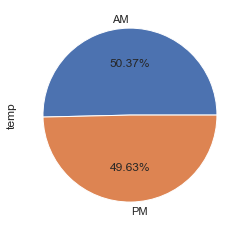

In [155]:
ampm = df.groupby('AM/PM').mean()['temp']
ampm.plot(kind='pie',autopct='%0.2f%%')

#### Insight 5

Somehow at 5-6 in the morning the temperature average is coming high while reast all is more or less same.

TO support abvoe line, AM has more temperature average. 

In [186]:
df.head()

,temp,out/in,Year,Month,Month Name,Quarter,Day_Name,Weekend,Day_Timing,Season,Hour,Min,AM/PM
0,29,In,2018,8,August,3,Sunday,1,Morning,Monsoon,9,30,AM
1,29,In,2018,8,August,3,Sunday,1,Morning,Monsoon,9,30,AM
2,41,Out,2018,8,August,3,Sunday,1,Morning,Monsoon,9,29,AM
3,41,Out,2018,8,August,3,Sunday,1,Morning,Monsoon,9,29,AM
4,31,In,2018,8,August,3,Sunday,1,Morning,Monsoon,9,29,AM


In [199]:
df['Year'].value_counts()

2018    97606
Name: Year, dtype: int64

#### Important features

temp
out/in
Month
Hour

#### Not required Features: 
Year : only one year is there 2018. No reuired 
Month Name,Quarter - We have month so we will not require these two features. 
Day_Name,Weekend,Day_Timing,Season,Min,AM/PM  --- All these features were important for EDA but not required for model building. 

In [202]:
df1 = df[['out/in','Month','Hour','temp']]
df1.head(1)

,out/in,Month,Hour,temp
0,In,8,9,29


In [206]:
# Separating the out and in temperature. For the above analysis we understood, both operate differently, 
# so need to make separate model for both.

outemp = df1[df1['out/in']=='Out']
intemp = df1[df1['out/in']=='In']

In [207]:
outemp.head(1)

,out/in,Month,Hour,temp
2,Out,8,9,41


In [208]:
# We don't need the out/in col now....So deleting that

outemp = outemp.drop(['out/in'],axis=1)
outemp.head(1)

,Month,Hour,temp
2,8,9,41


In [205]:
intemp.head(1)

,out/in,Month,Hour,temp
0,In,8,9,29


In [209]:
intemp = intemp.drop(['out/in'],axis=1)

In [210]:
intemp.head(1)

,Month,Hour,temp
0,8,9,29


# INSIDE TEMPERATURE Data.

In [211]:
intemp.head(1)

,Month,Hour,temp
0,8,9,29


In [212]:
x=intemp.iloc[:,0:2]
y=intemp.iloc[:,-1]

In [213]:
x

,Month,Hour
0,8,9
1,8,9
4,8,9
5,8,9
6,8,9
...,...,...
97601,7,7
97602,7,7
97603,7,7
97604,7,7


In [214]:
y

0        29
1        29
4        31
5        31
6        29
         ..
97601    31
97602    31
97603    31
97604    31
97605    31
Name: temp, Length: 20345, dtype: int64

In [215]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scx = sc.fit_transform(x)
scx

array([[-0.23271267, -0.32134404],
       [-0.23271267, -0.32134404],
       [-0.23271267, -0.32134404],
       ...,
       [-0.60277202, -0.67174304],
       [-0.60277202, -0.67174304],
       [-0.60277202, -0.67174304]])

In [218]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scx,y,test_size=0.2,random_state=101)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(16276, 2) (4069, 2) (16276,) (4069,)


# Linear Regression 

In [219]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [220]:
y_pred_train = lr.predict(x_train)
y_pred_test= lr.predict(x_test)

In [221]:
from sklearn.metrics import r2_score

print("Training Score - ",r2_score(y_train,y_pred_train))
print("Testing Score - ",r2_score(y_test,y_pred_test))


Training Score -  0.04069035137403221
Testing Score -  0.052329028712875036


In [ ]:
# Score is extremly bad. We will try to use OLS and see the summary. 

## Ordinary Least Square

In [222]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [224]:
ols = smf.OLS(endog=y_train,exog=x_train).fit()
y_pred_ols = ols.predict(x_test)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.985
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                      0.0505
Time:                        12:04:20   Log-Likelihood:                         -78740.
No. Observations:               16276   AIC:                                  1.575e+05
Df Residuals:                   16274   BIC:                                  1.575e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4328      0.240      1.806      0.071      -0.037       0.903
x2             0.4143      0.239      1.731      0.083      -0.055       0.883
==============================================================================
Omnibus:                      381.112   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.948
Skew:                          -0.108   Prob(JB):                     1.28e-47
Kurtosis:                       2.479   Cond. No.                         1.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Durbin watson test result is very low(it ranges from 0-4). If it is 2 or nearly 2 we can say that we can do Linear regression on the dataset. But here it doesn't look like so. 

2. p-test :: Both the feature - hour and month have p-value more than 0.05. Both the feature doesn't seem to predict the temperature well. 

3. R-squared and adjusted R-squared both are 0. It is a bad model.

#### WIthout scaled data

In [237]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=101)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

lr = LinearRegression()
lr.fit(x_train1,y_train1)

(16276, 2) (4069, 2) (16276,) (4069,)


LinearRegression()

In [238]:
y_pred_train1 = lr.predict(x_train1)
y_pred_test1 = lr.predict(x_test1)

In [241]:
print("Training Score - ",r2_score(y_train1,y_pred_train1))
print("Testing Score - ",r2_score(y_test1,y_pred_test1))


Training Score -  0.04069035137403232
Testing Score -  0.052329028712875036


In [242]:
ols = smf.OLS(endog=y_train1,exog=x_train1).fit()
y_pred_ols = ols.predict(x_test1)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          1.216e+05
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:40:42   Log-Likelihood:                         -56207.
No. Observations:               16276   AIC:                                  1.124e+05
Df Residuals:                   16274   BIC:                                  1.124e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Month          2.4335      0.012    200.107      0.000       2.410       2.457
Hour           0.6980      0.009     78.057      0.000       0.681       0.716
==============================================================================
Omnibus:                     1013.763   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1211.539
Skew:                           0.651   Prob(JB):                    8.27e-264
Kurtosis:                       3.303   Cond. No.                         3.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result is much better, showing good values. 

1. Durbin-Watson:	1.898  ::: Okay for linear regression
2. p-value for both features are 0 which is less than 0.05 hence, it is helping in the prediction. 
3. R2 and adjusted R2 value is also good - 93% which is good. 

# OUT-TEMPERATURE Data

In [226]:
outemp.head(1)

,Month,Hour,temp
2,8,9,41


In [230]:
xo=intemp.iloc[:,0:2]
yo=intemp.iloc[:,-1]

In [231]:
xo

,Month,Hour
0,8,9
1,8,9
4,8,9
5,8,9
6,8,9
...,...,...
97601,7,7
97602,7,7
97603,7,7
97604,7,7


In [232]:
yo

0        29
1        29
4        31
5        31
6        29
         ..
97601    31
97602    31
97603    31
97604    31
97605    31
Name: temp, Length: 20345, dtype: int64

In [243]:
x_traino,x_testo,y_traino,y_testo = train_test_split(xo,yo,test_size=0.2,random_state=101)
print(x_traino.shape,x_testo.shape,y_traino.shape,y_testo.shape)


(16276, 2) (4069, 2) (16276,) (4069,)


In [244]:
lr = LinearRegression()
lr.fit(x_traino,y_traino)

LinearRegression()

In [245]:
y_pred_traino = lr.predict(x_traino)
y_pred_testo = lr.predict(x_testo)

In [246]:
print("Training Score - ",r2_score(y_traino,y_pred_traino))
print("Testing Score - ",r2_score(y_testo,y_pred_testo))


Training Score -  0.04069035137403232
Testing Score -  0.052329028712875036


In [247]:
ols = smf.OLS(endog=y_traino,exog=x_traino).fit()
y_pred_ols = ols.predict(x_testo)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          1.216e+05
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:41:43   Log-Likelihood:                         -56207.
No. Observations:               16276   AIC:                                  1.124e+05
Df Residuals:                   16274   BIC:                                  1.124e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Month          2.4335      0.012    200.107      0.000       2.410       2.457
Hour           0.6980      0.009     78.057      0.000       0.681       0.716
==============================================================================
Omnibus:                     1013.763   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1211.539
Skew:                           0.651   Prob(JB):                    8.27e-264
Kurtosis:                       3.303   Cond. No.                         3.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result is good for OLS.

1. Durbin-Watson:	1.898  ::: Okay for linear regression
2. p-value for both features are 0 which is less than 0.05 hence, it is helping in the prediction. 
3. R2 and adjusted R2 value is also good - 93% which is good. 

# DONE